# Linear Regression From Scratch

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
class LinearRegressionX():
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters

    def fit(self, X, y):
        # init parameters
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        self.X = X
        self.y = y

        # gradient descent
        for _ in range(self.n_iters):
            self.update_weights()
        
    def update_weights(self):
        y_predicted = np.dot(self.X, self.weights) + self.bias

        # compute gradients
        dw = (1 / self.n_samples) * np.dot(self.X.T, (y_predicted - self.y))
        db = (1 / self.n_samples) * np.sum(y_predicted - self.y)
        # update parameters
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias # y_approximated

#### Preprocessing 

In [7]:
salary_df = pd.read_csv('datasets/Salary_Data.csv')

In [8]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
salary_df.shape

(30, 2)

### Split

In [12]:
from sklearn.model_selection import train_test_split

X = salary_df.iloc[:, :-1].values
y = salary_df.iloc[:, 1].values

X, y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### Fit Custom Linear Regression Model

In [14]:
model = LinearRegressionX(learning_rate=0.02, n_iters=1000)

model.fit(X_train, y_train)

In [15]:
print('weight: ', model.weights[0])
print('bias: ', model.bias)

weight:  9613.82807150452
bias:  23173.61056081348


In [16]:
y_pred = model.predict(X_test)

y_pred

array([ 35671.58705377,  33748.82143947,  66435.83688258,  58744.77442538,
        91431.7898685 ,  80856.57898984, 102007.00074715,  52015.09477533,
        42401.26670382])

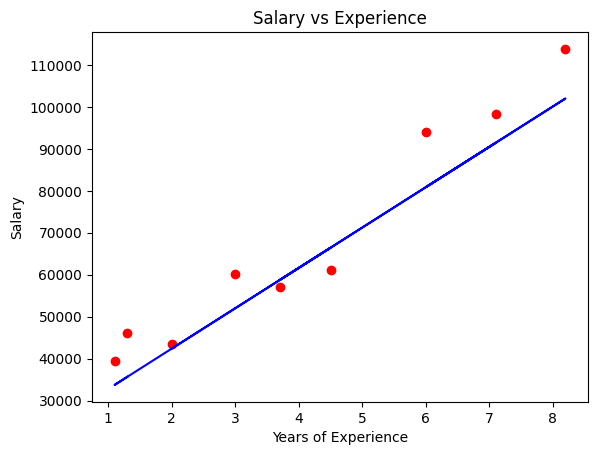

In [17]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Evaluate Model

In [18]:
# calculate MSE and RMSE

mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  66421941.35992523
RMSE:  8149.965727530714


#### Train for Linear Regression from scikit.learn 

In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

model2 = regressor.fit(X_train, y_train)
print('weight: ', model2.coef_[0])
print('bias: ', model2.intercept_)

y_pred2 = model2.predict(X_test)

y_pred2

weight:  9532.835536036773
bias:  23750.935563595012


array([ 36143.62176044,  34237.05465324,  66648.69547576,  59022.42704693,
        91434.06786946,  80947.94877982, 101920.1869591 ,  52349.44217171,
        42816.60663567])

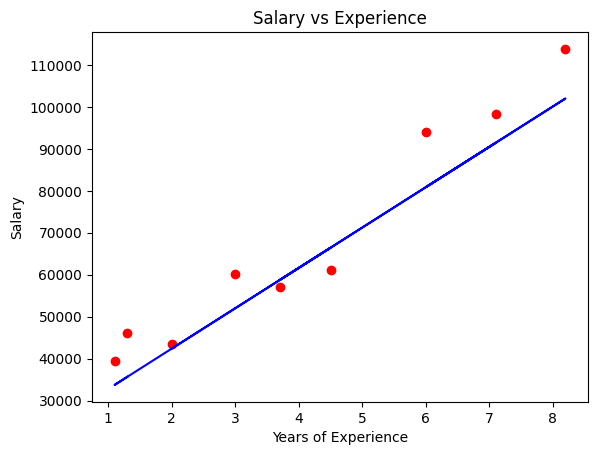

In [20]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Evaluate Model

In [21]:
# calculate MSE and RMSE

mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  66421941.35992523
RMSE:  8149.965727530714
